In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("auto-mpg.csv")

In [ ]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [ ]:
df.shape

(398, 9)

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna()

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce').astype(float)

In [ ]:
df = df.dropna()

In [ ]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model year','origin']]

In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,1
396,4,120.0,79.0,2625,18.6,82,1


In [ ]:
y = df['mpg']

In [ ]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

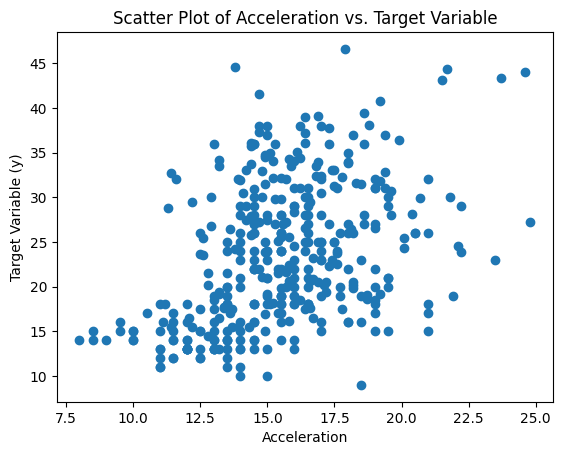

In [ ]:
plt.scatter(X['acceleration'], y)
plt.xlabel('Acceleration')
plt.ylabel('Target Variable (y)')
plt.title('Scatter Plot of Acceleration vs. Target Variable')
plt.show()

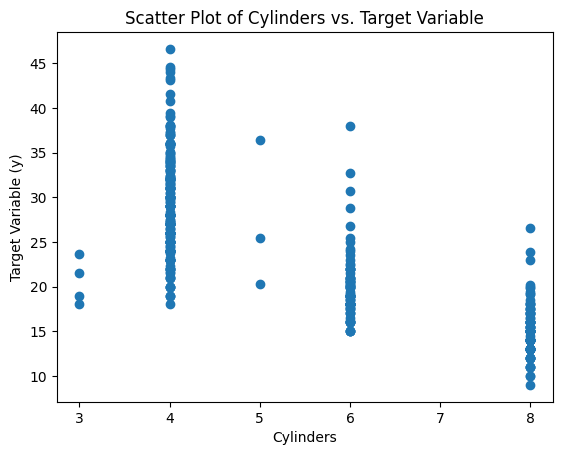

In [ ]:
plt.scatter(X['cylinders'], y)
plt.xlabel('Cylinders')
plt.ylabel('Target Variable (y)')
plt.title('Scatter Plot of Cylinders vs. Target Variable')
plt.show()

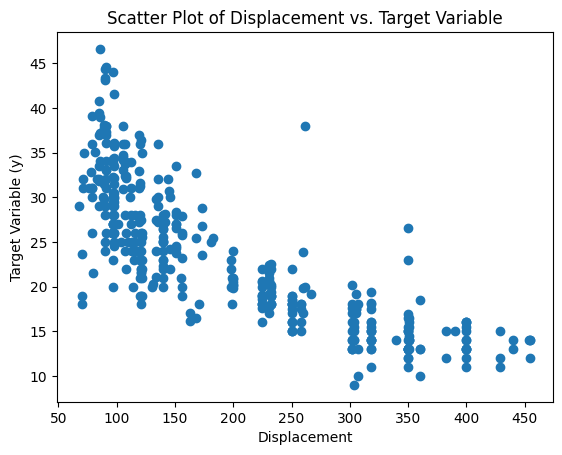

In [ ]:
plt.scatter(X['displacement'], y)
plt.xlabel('Displacement')
plt.ylabel('Target Variable (y)')
plt.title('Scatter Plot of Displacement vs. Target Variable')
plt.show()

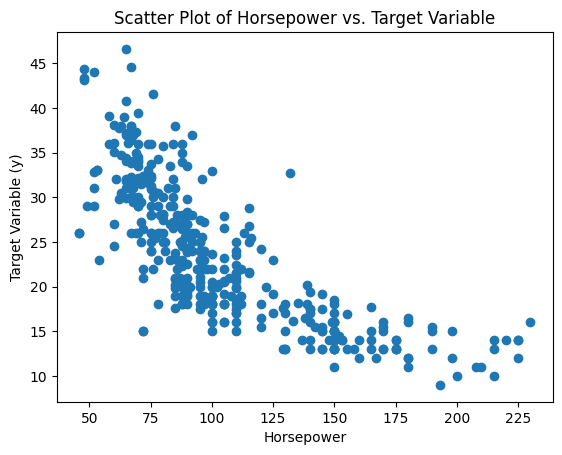

In [ ]:
plt.scatter(X['horsepower'], y)
plt.xlabel('Horsepower')
plt.ylabel('Target Variable (y)')
plt.title('Scatter Plot of Horsepower vs. Target Variable')
plt.show()

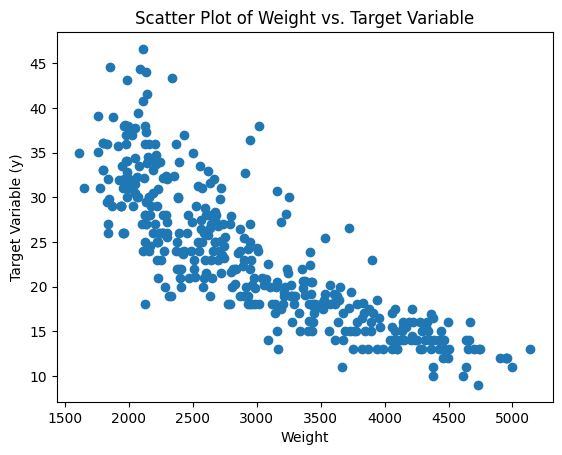

In [ ]:
plt.scatter(X['weight'], y)
plt.xlabel('Weight')
plt.ylabel('Target Variable (y)')
plt.title('Scatter Plot of Weight vs. Target Variable')
plt.show()

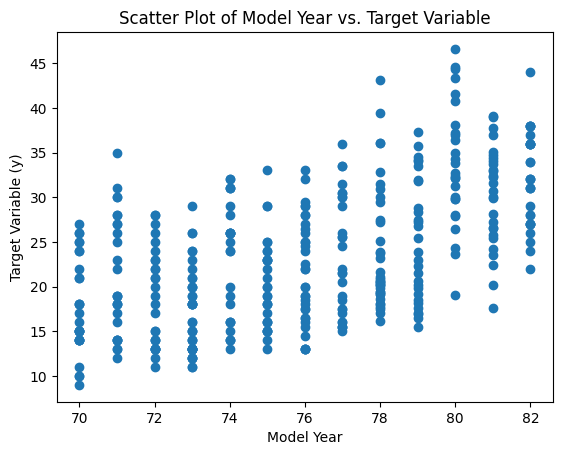

In [ ]:
plt.scatter(X['model year'], y)
plt.xlabel('Model Year')
plt.ylabel('Target Variable (y)')
plt.title('Scatter Plot of Model Year vs. Target Variable')
plt.show()

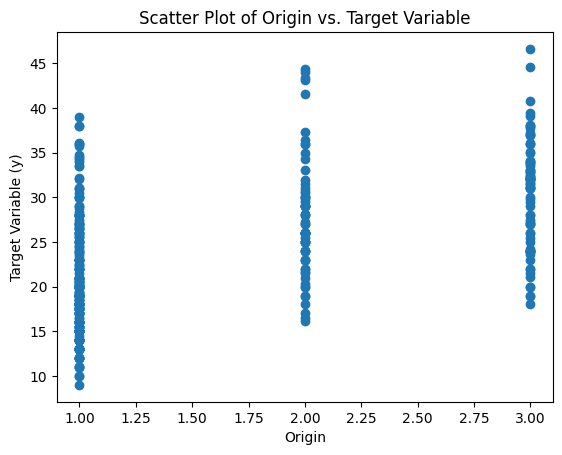

In [ ]:
plt.scatter(X['origin'], y)
plt.xlabel('Origin')
plt.ylabel('Target Variable (y)')
plt.title('Scatter Plot of Origin vs. Target Variable')
plt.show()

In [ ]:
correlation_matrix = df.corr()

<ipython-input-197-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
import seaborn as sns

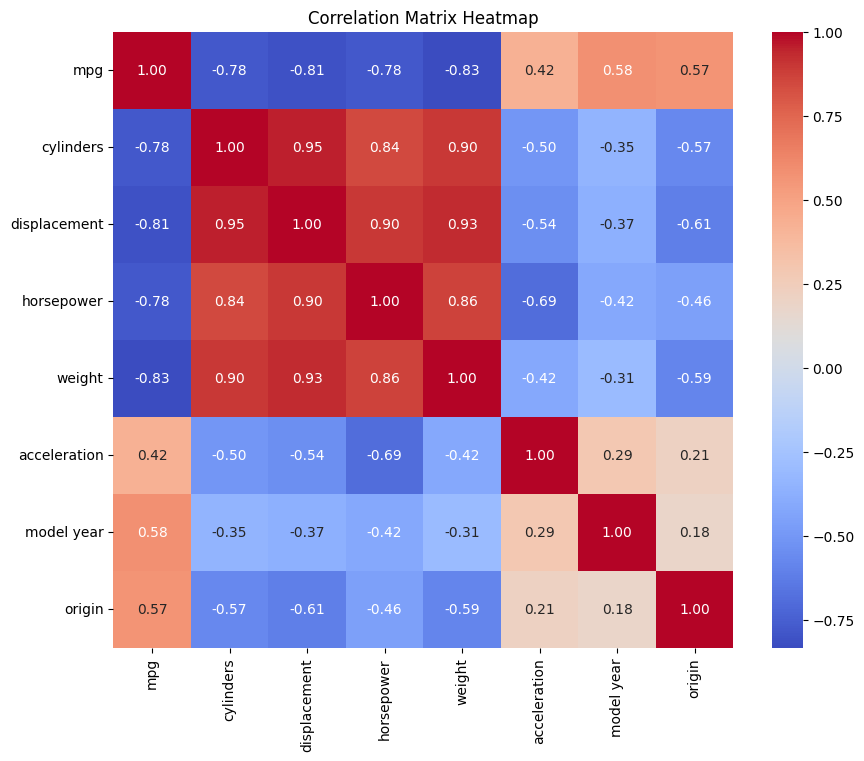

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.06587778358935


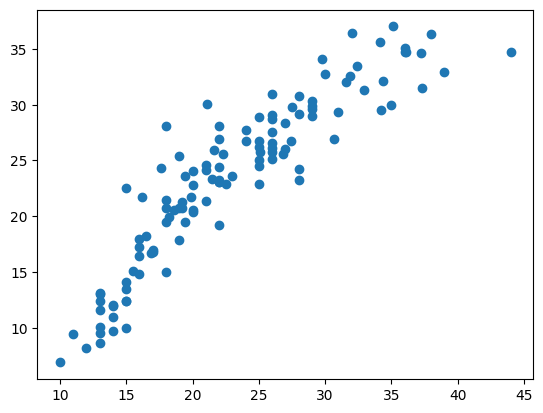

In [ ]:
plt.scatter(y_test, predictions)

In [ ]:
model.coef_

array([-0.61268144,  1.65057914, -1.07906363, -5.09480878,  0.11351554,
        2.73016028,  1.34655457])

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
min_alpha_lasso = 100
min_mse = 100
for i in range(1000):
  alpha = i/1000
  lasso_model = Lasso(alpha=alpha)
  lasso_model.fit(X_train, y_train)
  lasso_predictions = lasso_model.predict(X_test)
  lasso_mse = mean_squared_error(y_test, lasso_predictions)
  if(lasso_mse < min_mse):
    min_mse = lasso_mse
    min_alpha_lasso = alpha
  print(f'Lasso Regression Mean Squared Error: {lasso_mse} at alpha: {alpha}')
print(f'Alpha: {min_alpha_lasso} MSE: {min_mse}')

<ipython-input-231-dc7e770647fe>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.560e+03, tolerance: 1.754e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso Regression Mean Squared Error: 10.065877783589348 at alpha: 0.0
Lasso Regression Mean Squared Error: 10.071862438767191 at alpha: 0.001
Lasso Regression Mean Squared Error: 10.077687494415652 at alpha: 0.002
Lasso Regression Mean Squared Error: 10.083857806023527 at alpha: 0.003
Lasso Regression Mean Squared Error: 10.090234593049493 at alpha: 0.004
Lasso Regression Mean Squared Error: 10.09689415664967 at alpha: 0.005
Lasso Regression Mean Squared Error: 10.103639598180646 at alpha: 0.006
Lasso Regression Mean Squared Error: 10.11071024480573 at alpha: 0.007
Lasso Regression Mean Squared Error: 10.11800723852737 at alpha: 0.008
Lasso Regression Mean Squared Error: 10.12548619099592 at alpha: 0.009
Lasso Regression Mean Squared Error: 10.133190979589793 at alpha: 0.01
Lasso Regression Mean Squared Error: 10.14113081531679 at alpha: 0.011
Lasso Regression Mean Squared Error: 10.149779662589076 at alpha: 0.012
Lasso Regression Mean Squared Error: 10.158621331792181 at alpha: 0.013


In [ ]:
alpha = 0.614
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Regression Mean Squared Error: {lasso_mse} at alpha: {alpha}')

Lasso Regression Mean Squared Error: 9.73946198101599 at alpha: 0.614


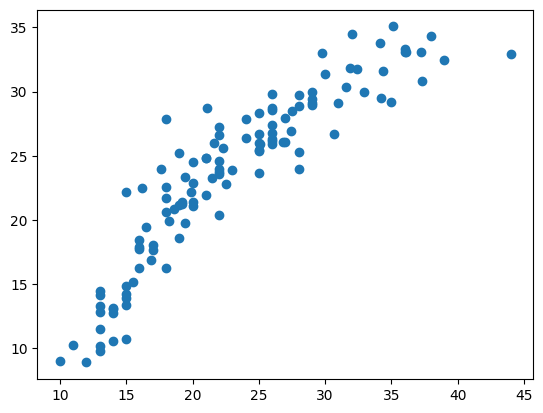

In [ ]:
plt.scatter(y_test, lasso_predictions)

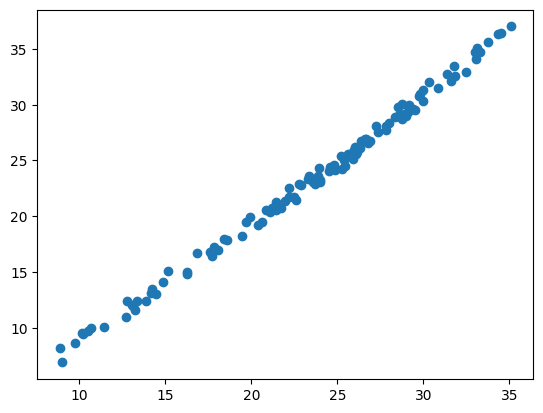

In [ ]:
plt.scatter(lasso_predictions, predictions)

In [ ]:
min_alpha_ridge = 100
min_mse = 100
for i in range(1000):
  alpha = i/10000
  ridge_model = Ridge(alpha=alpha)
  ridge_model.fit(X_train, y_train)
  ridge_predictions = ridge_model.predict(X_test)
  ridge_mse = mean_squared_error(y_test, ridge_predictions)
  if(ridge_mse < min_mse):
    min_mse = ridge_mse
    min_alpha_ridge = alpha
  print(f'Ridge Regression Mean Squared Error: {ridge_mse} at alpha: {alpha}')
print(f'Alpha: {min_alpha_ridge} MSE: {min_mse}')

Ridge Regression Mean Squared Error: 10.065877783589357 at alpha: 0.0
Ridge Regression Mean Squared Error: 10.065884227640867 at alpha: 0.0001
Ridge Regression Mean Squared Error: 10.065890671682832 at alpha: 0.0002
Ridge Regression Mean Squared Error: 10.06589711571523 at alpha: 0.0003
Ridge Regression Mean Squared Error: 10.065903559738077 at alpha: 0.0004
Ridge Regression Mean Squared Error: 10.065910003751355 at alpha: 0.0005
Ridge Regression Mean Squared Error: 10.065916447755065 at alpha: 0.0006
Ridge Regression Mean Squared Error: 10.065922891749208 at alpha: 0.0007
Ridge Regression Mean Squared Error: 10.065929335733776 at alpha: 0.0008
Ridge Regression Mean Squared Error: 10.06593577970876 at alpha: 0.0009
Ridge Regression Mean Squared Error: 10.065942223674167 at alpha: 0.001
Ridge Regression Mean Squared Error: 10.065948667629984 at alpha: 0.0011
Ridge Regression Mean Squared Error: 10.06595511157622 at alpha: 0.0012
Ridge Regression Mean Squared Error: 10.065961555512862 at

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
lasso_model = Lasso()

alphas = np.logspace(-1, 1, 1000)

param_grid = {'alpha': alphas}

grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best Alpha:", grid_search.best_params_['alpha'])
print("Best Mean Squared Error:", -grid_search.best_score_)

Best Alpha: 0.1
Best Mean Squared Error: 12.369603209852656


In [ ]:
model.coef_

array([-0.61268144,  1.65057914, -1.07906363, -5.09480878,  0.11351554,
        2.73016028,  1.34655457])

In [ ]:
lasso_model.coef_

array([-0.        , -0.        , -0.74006427, -4.32391149,  0.        ,
        2.20963537,  0.78535771])

In [ ]:
ridge_model.coef_

array([-0.54205216,  1.3708072 , -1.1057379 , -4.89026307,  0.07698025,
        2.70596681,  1.32927982])